In [1]:
### Scraping AirBNB Data for New Zealand

In [2]:
# Loading all necessary libraries

library(tidyverse) # loading this library so it allows us to tidy up and graph our data findings
library(magrittr) # loading this library so it allows us to use the pipe operator.
library(purrr) # loading this library so it allows us to create and work with functions
library(glue) # loading this library so it allows us to concatenate variable when it is specified.
library(stringr) # loading this library so it allows us to utilise string manipulations.
library(rvest) # loading this library so it allows us to use functions for web scraping.
library(jsonlite) # loading this library so it allows us to use functions when dealing with files in a JSON format.
library(ggplot2) # loading this library so it allows us to plot graphs

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [3]:
# Reading in the CSV that contains all the data about Air BNBs in NZ
nz_airbnb <- read_csv("http://data.insideairbnb.com/new-zealand/2023-09-02/data/listings.csv.gz")

Rows: 46412 Columns: 80
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (26): listing_url, name, description, neighborhood_overview, picture_ur...
dbl  (37): id, scrape_id, host_id, host_listings_count, host_total_listings_...
lgl  (11): host_is_superhost, host_has_profile_pic, host_identity_verified, ...
date  (6): last_searched, last_scraped, host_since, calendar_last_scraped, f...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# looking into the CSV and viewing the variable names
glimpse(nz_airbnb) 

Rows: 46,412
Columns: 80
$ id                                           <dbl> 6113, 35325, 46071, 48443…
$ listing_url                                  <chr> "https://www.airbnb.com/r…
$ scrape_id                                    <dbl> 2.02309e+13, 2.02309e+13,…
$ last_searched                                <date> NA, NA, 2023-09-03, NA, …
$ last_scraped                                 <date> 2023-09-04, 2023-09-04, …
$ name                                         <chr> "Place to stay in Otaki ·…
$ description                                  <chr> "<b>The space</b><br />La…
$ neighborhood_overview                        <chr> NA, "We are located in th…
$ picture_url                                  <chr> "https://a0.muscache.com/…
$ host_id                                      <dbl> 12177, 152089, 202747, 22…
$ host_url                                     <chr> "https://www.airbnb.com/u…
$ host_name                                    <chr> "Dianne", "Chika", "Donna…
$ host_since   

In [5]:
# wrangling the data and creating a table with the selected variables

nz_airbnb <- (nz_airbnb %>% select(price,bathrooms_text, bedrooms))
nz_airbnb

price,bathrooms_text,bedrooms
<chr>,<chr>,<dbl>
$109.00,NA,1
$250.00,1.5 baths,3
$255.00,2 baths,5
$119.00,NA,1
$119.00,NA,1
$290.00,1 private bath,1
$123.00,NA,1
$106.00,1 private bath,NA
$70.00,1 bath,NA


In [6]:
# Cleaning the price column to remove $ symbols and converting it to numeric
nz_airbnb$price <- as.numeric(gsub(",", "", gsub("\\$", "", nz_airbnb$price)))

In [7]:
# subsetting the data to the first 100 rows as the data contains 46,000 rows
subset_data <- nz_airbnb[1:100, ]

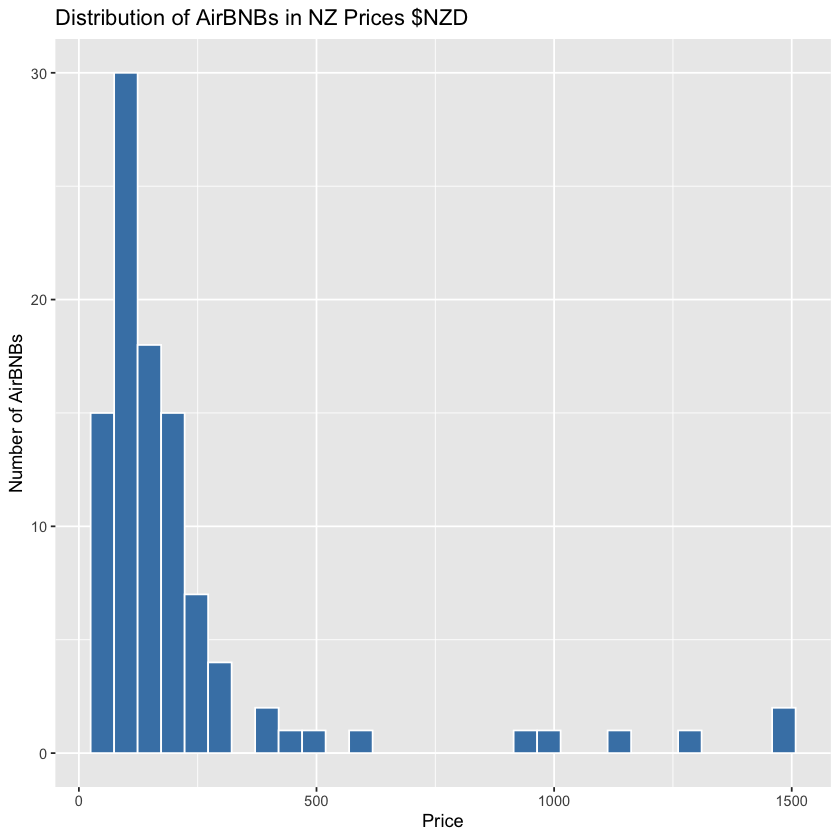

In [8]:
# creating a plot for the price distribution 
p1 <- ggplot(subset_data, aes(x = price)) + 
  geom_histogram(fill = "steelblue", color = "white", bins = 30) + 
  ggtitle("Distribution of AirBNBs in NZ Prices $NZD") + 
  xlab("Price") + 
  ylab("Number of AirBNBs")

p1

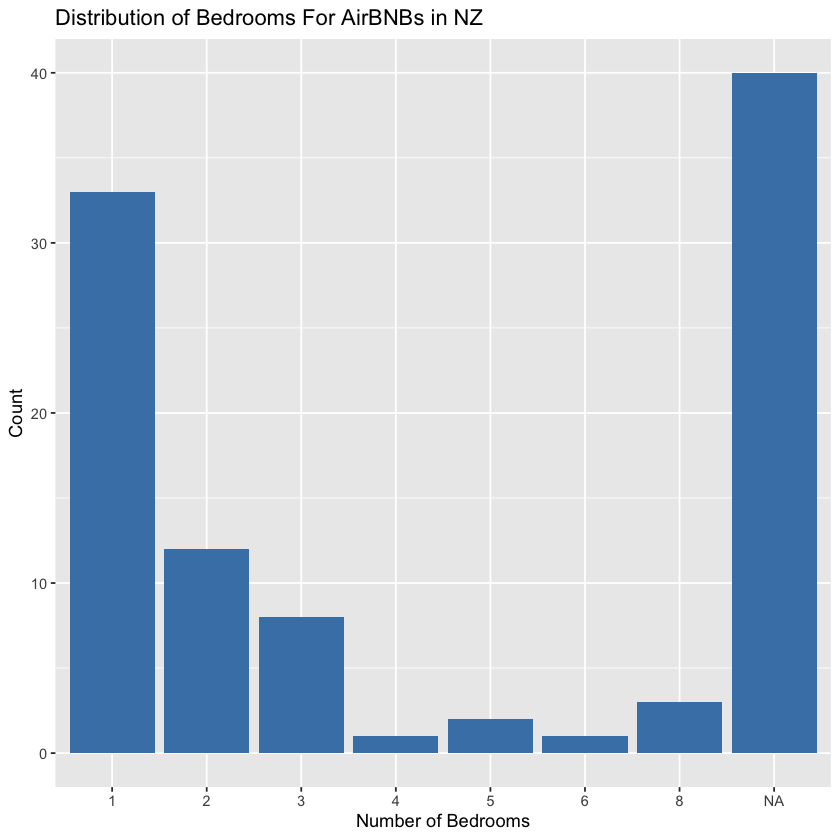

In [9]:
# creating a plot for the distribution of bedrooms
p2 <- ggplot(subset_data, aes(x = as.factor(bedrooms))) + 
  geom_bar(fill = "steelblue") + 
  ggtitle("Distribution of Bedrooms For AirBNBs in NZ") + 
  xlab("Number of Bedrooms") + 
  ylab("Count")
p2

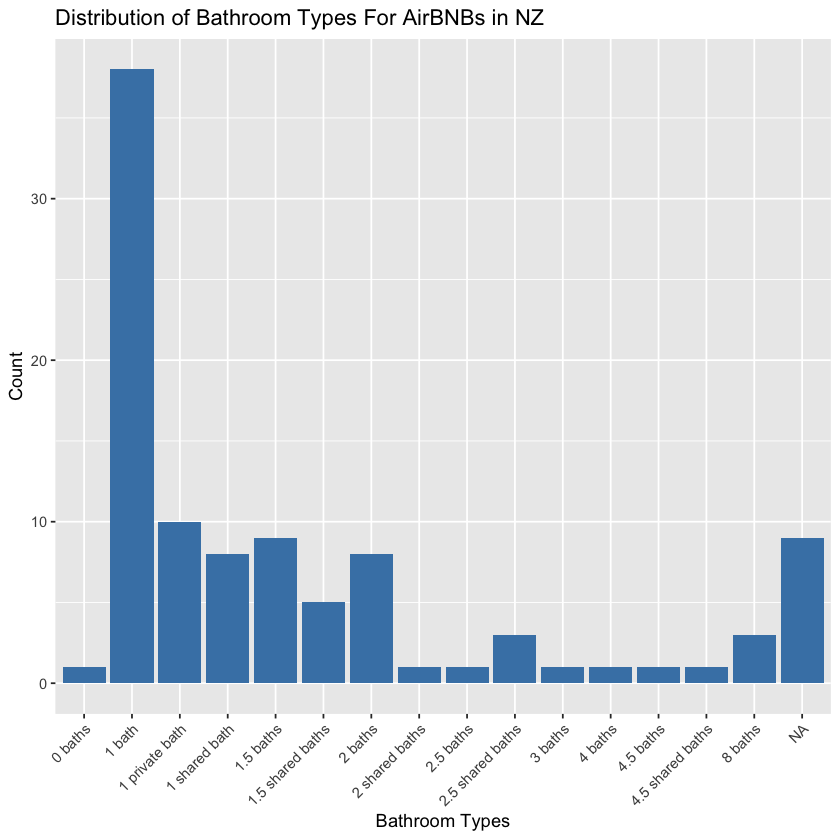

In [10]:
# creating a plot for the distribution of the type bathrooms

p3 <- ggplot(subset_data, aes(x = bathrooms_text)) + 
  geom_bar(fill = "steelblue") + 
  ggtitle("Distribution of Bathroom Types For AirBNBs in NZ") + 
  xlab("Bathroom Types") + 
  ylab("Count") + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p3

Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


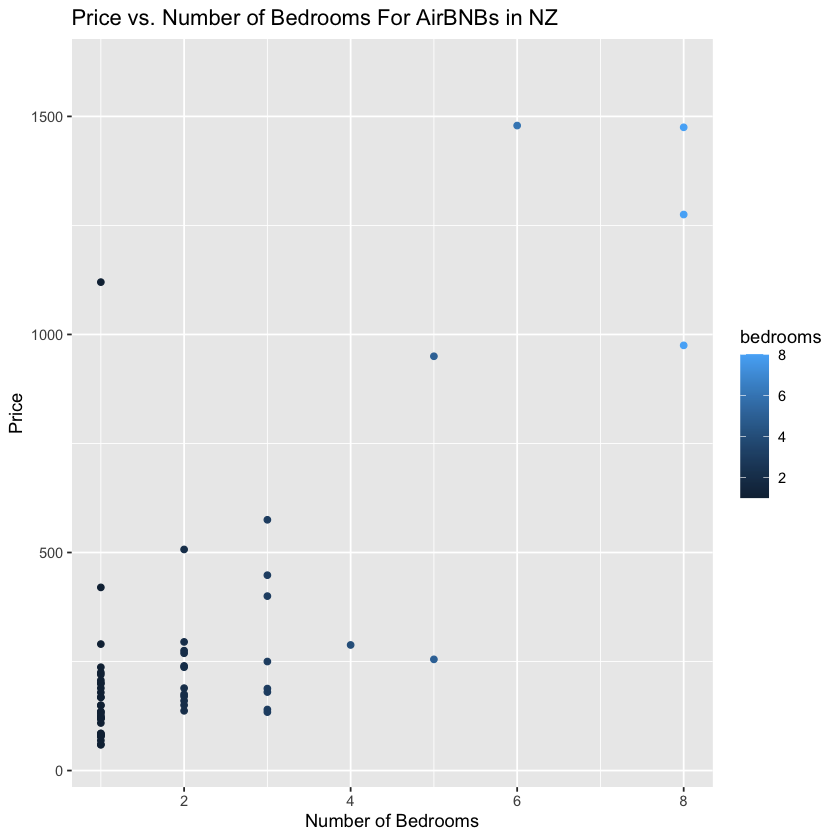

In [11]:
# plotting the price against amount of bedrooms

p4 <- ggplot(subset_data, aes(x = bedrooms, y = price)) + 
  geom_point(aes(color = bedrooms)) + 
  ggtitle("Price vs. Number of Bedrooms For AirBNBs in NZ") + 
  xlab("Number of Bedrooms") + 
  ylab("Price") + 
  ylim(40, 1600)
p4

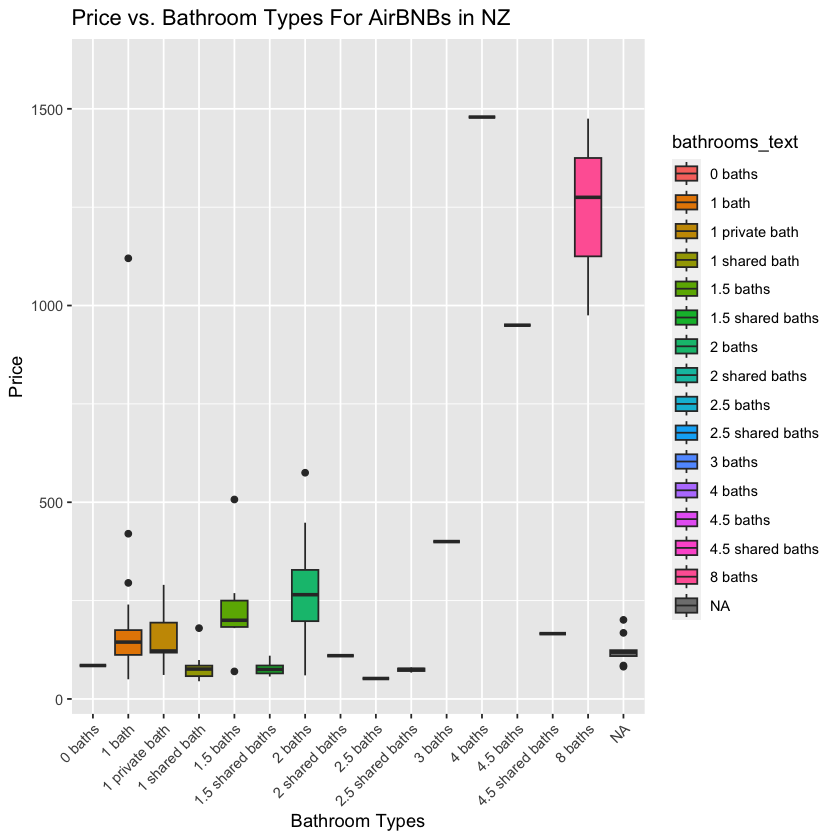

In [12]:
# plotting the price against amount of bathrooms
p5 <- ggplot(subset_data, aes(x = bathrooms_text, y = price)) + 
  geom_boxplot(aes(fill = bathrooms_text)) + 
  ggtitle("Price vs. Bathroom Types For AirBNBs in NZ") + 
  xlab("Bathroom Types") + 
  ylab("Price") + 
  ylim(40, 1600) + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p5